In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df=pd.read_csv("Happinessindex.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


The World Happiness 2017, which ranks 158 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [3]:
df.shape

(158, 12)

In [4]:
df.isnull().sum()
#There are no null values 

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


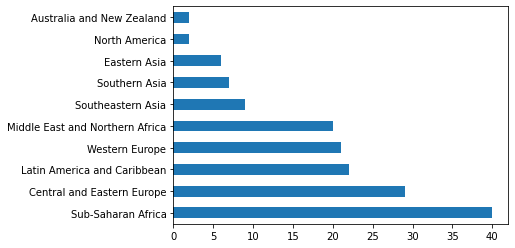

In [5]:
df['Region'].value_counts().plot(kind='barh')
print(df['Region'].value_counts())
#we observe the region distribution of the countries 

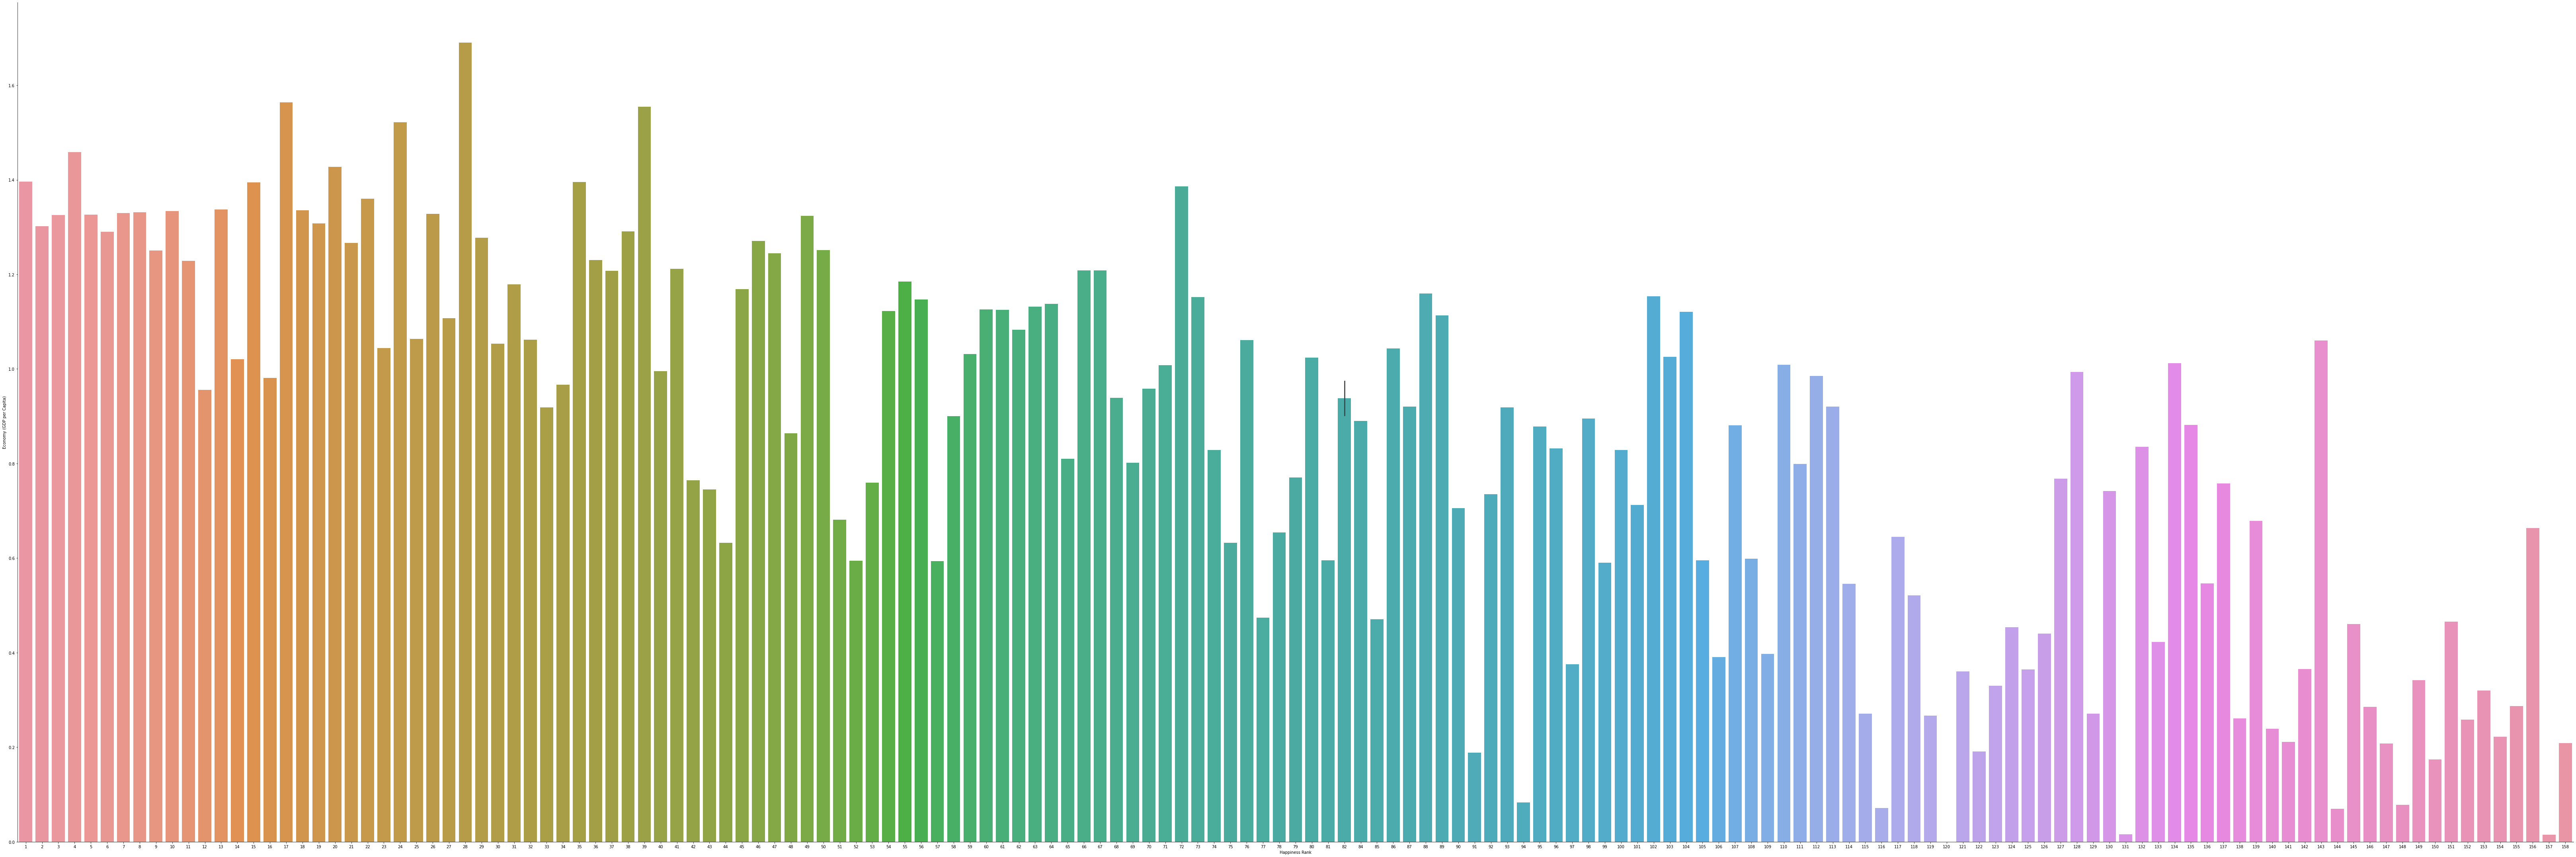

In [6]:
sns.catplot(x="Happiness Rank", y="Economy (GDP per Capita)", data=df, height=30,aspect=3,kind="bar")
#We can observe a positive coreation in the trends countries with higher GDP Generally have higher happiness rank

(array([ 7., 17., 14., 14., 19., 24., 26., 26.,  7.,  4.]),
 array([0.      , 0.169042, 0.338084, 0.507126, 0.676168, 0.84521 ,
        1.014252, 1.183294, 1.352336, 1.521378, 1.69042 ]),
 <a list of 10 Patch objects>)

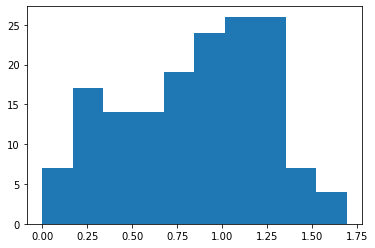

In [7]:
plt.hist(df['Economy (GDP per Capita)'], 10)

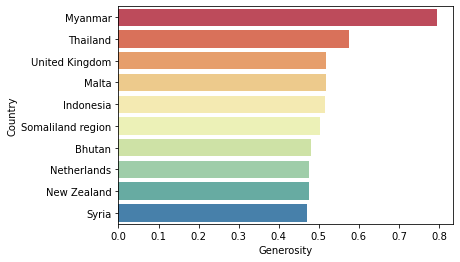

In [8]:
sns.barplot(x='Generosity' ,y='Country',data=df.nlargest(10,'Generosity'),palette='Spectral')

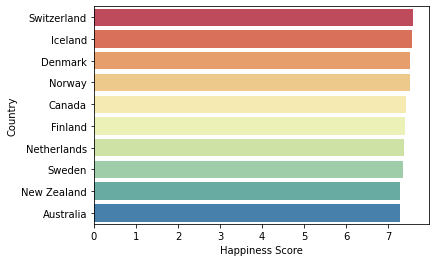

In [9]:
sns.barplot(x='Happiness Score' ,y='Country',data=df.nlargest(10,'Happiness Score'),palette='Spectral')


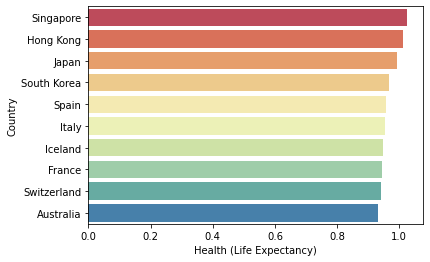

In [10]:
sns.barplot(x='Health (Life Expectancy)' ,y='Country',data=df.nlargest(10,'Health (Life Expectancy)'),palette='Spectral')


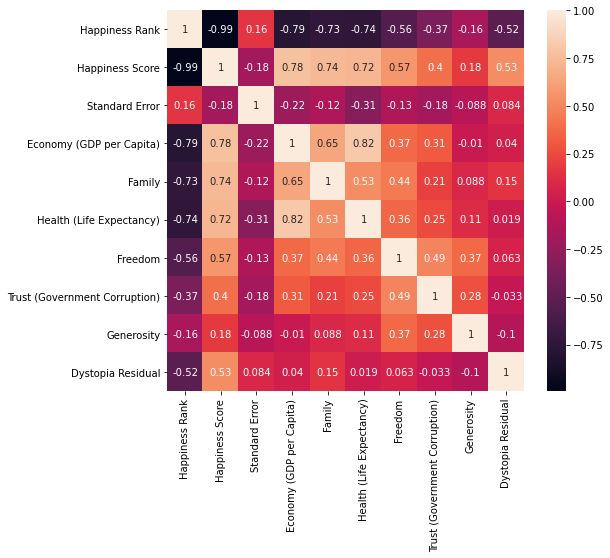

In [11]:
corr_hmap= df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()
#we can observe that happiness score has high correlation with "Economy (GDP per Capita)","Family","Health (Life Expectancy)"

In [12]:
df.loc[df['Country']=='India']
#India's Happiness Rank is 117 with 4.565 Score

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


Text(0.5, 1.0, 'Life Expectancy vs Happiness Score in 2015')

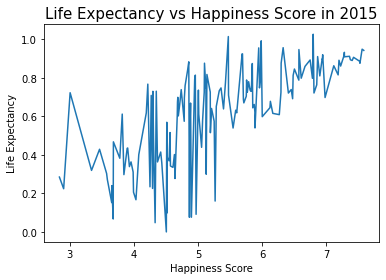

In [13]:
plt.plot(df['Happiness Score'], df['Health (Life Expectancy)'])
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Happiness Score in 2015', fontsize = 15)


Life expectancy in the counties with higher happiness score is better constantly

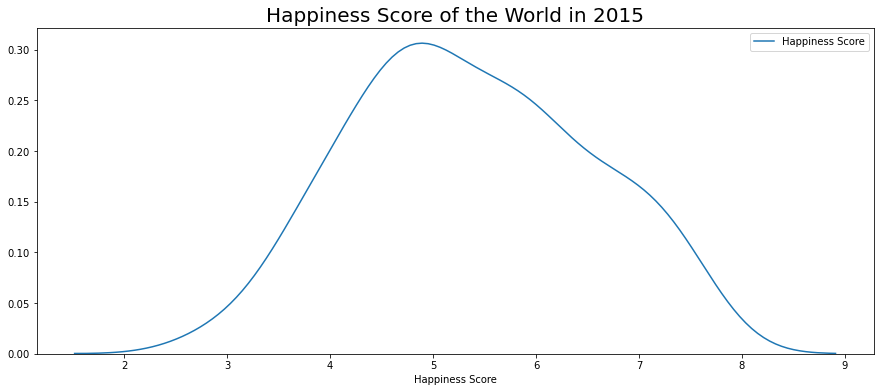

In [14]:
plt.figure(figsize = (15,6))
sns.kdeplot(df['Happiness Score'])
plt.title('Happiness Score of the World in 2015', fontsize = 20)
plt.xlabel('Happiness Score' )
plt.show()

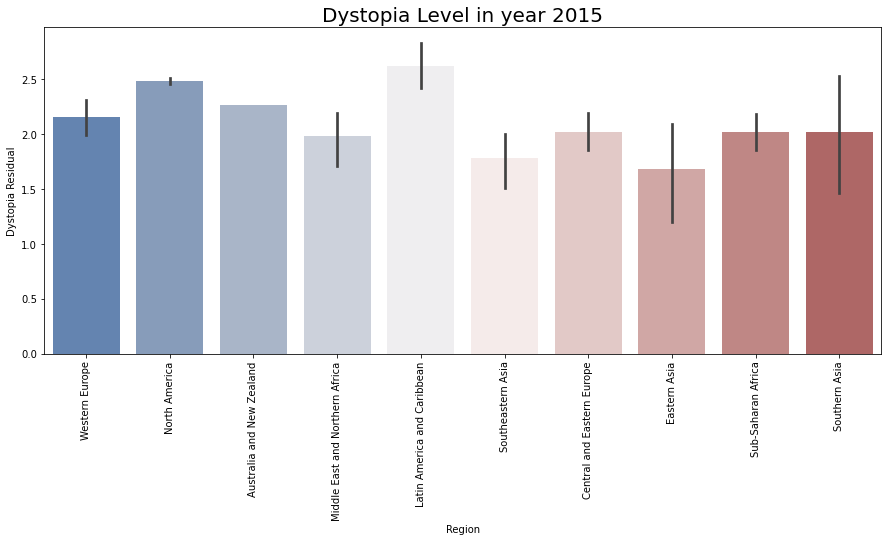

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Dystopia Residual', data = df, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title('Dystopia Level in year 2015', fontsize = 20)
plt.show()


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. 

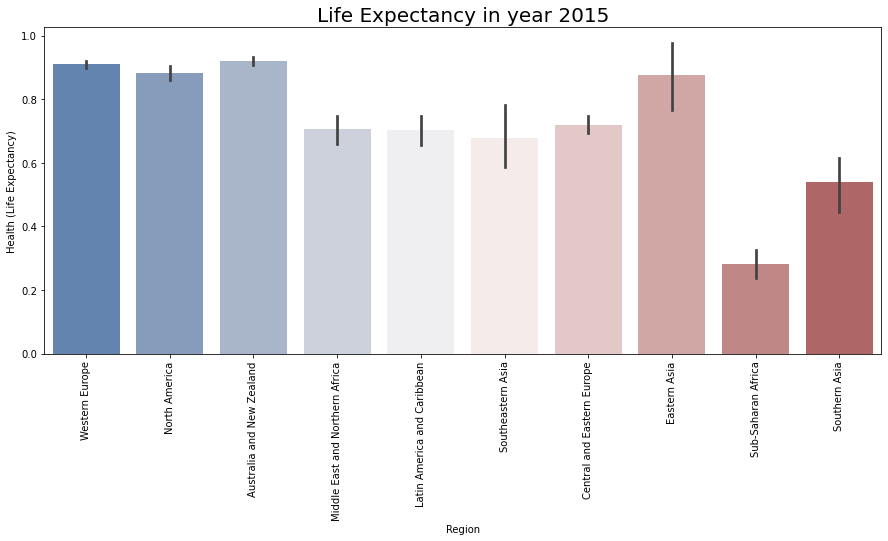

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Health (Life Expectancy)', data = df, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title('Life Expectancy in year 2015', fontsize = 20)
plt.show()

Sub-Saharan Africa - Has the least Life Expetancy 

Text(0.5, 1.0, 'Trust (Government Corruption) vs Happiness Score in 2015')

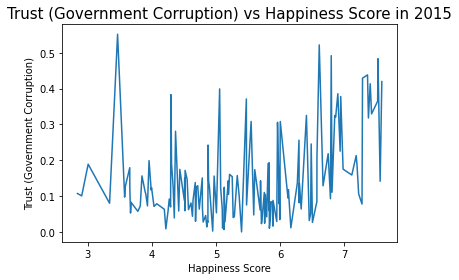

In [17]:
plt.plot(df['Happiness Score'], df['Trust (Government Corruption)'])
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
plt.title('Trust (Government Corruption) vs Happiness Score in 2015', fontsize = 15)

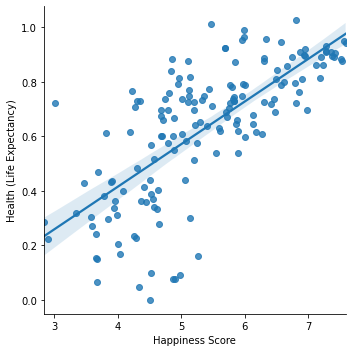

In [18]:
sns.lmplot(x='Happiness Score', y='Health (Life Expectancy)', data=df)

We can see a positive trend in happiness score and health 

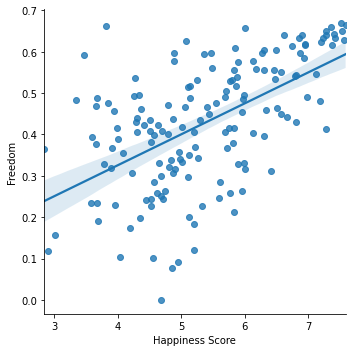

In [19]:
sns.lmplot(x='Happiness Score', y='Freedom', data=df)

In [23]:
df.drop(["Country"],axis=1, inplace =True)
#We can drop the Column as the name of the country dosent play any role in scoring the happiness

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["Region"]] = df[["Region"]].apply(le.fit_transform)
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [25]:
#We Can go ahead with Model Building and predict the Happiness Score using other factors 

In [26]:
y=df["Happiness Score"]
x=df.drop("Happiness Score", axis=1)
num_folds = 10
seed = 30
scoring = 'neg_mean_squared_error'

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [29]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 30 The model Perfomes very well
Training r2_score is: 99.99999445164144
Testing r2_score is: 99.99999336270366
At random state 31 The model Perfomes very well
Training r2_score is: 99.99999442644899
Testing r2_score is: 99.9999929071592
At random state 32 The model Perfomes very well
Training r2_score is: 99.99999391844754
Testing r2_score is: 99.99999479725203
At random state 33 The model Perfomes very well
Training r2_score is: 99.99999324867173
Testing r2_score is: 99.99999653633553
At random state 34 The model Perfomes very well
Training r2_score is: 99.99999458241213
Testing r2_score is: 99.99999119485717
At random state 35 The model Perfomes very well
Training r2_score is: 99.99999465097183
Testing r2_score is: 99.99999244957472
At random state 36 The model Perfomes very well
Training r2_score is: 99.99999485012628
Testing r2_score is: 99.99999076187484
At random state 37 The model Perfomes very well
Training r2_score is: 99.9999939794331
Testing r2_score is: 99.9

Model is perfoming well in most randomstates with very high R2 Score so we are consider 30 as the randomstate value 

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=30)

In [31]:
Lr = LinearRegression(normalize=True)
Lr.fit(x_train,y_train)
y_pred = Lr.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.9999999336270367


In [32]:
ls = Lasso()
ls.fit(x_train,y_train)
y_pred = ls.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.1761931017022269


In [33]:
Rf = RandomForestRegressor()
Rf.fit(x_train,y_train)
y_pred = Rf.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.997357170376699


In [34]:
rd =Ridge()
rd.fit(x_train,y_train)
y_pred = rd.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.9997655911971691


Linear Regressor has been perfoming well we can go ahead with parameter tuning 

In [39]:
parameters={"copy_X":[True,False], "fit_intercept":[True,False], "n_jobs":[-1,None], "normalize":[False,True]}
Lr = LinearRegression()
clf=GridSearchCV(Lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}


In [42]:
Lr = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= -1, normalize= False)
Lr.fit(x_train,y_train)
Lr.score(x_train,y_train)
y_pred = Lr.predict(x_test)

Lrs = r2_score(y_test,y_pred)
print("r2 score is :",Lrs*100)

Lrscore=cross_val_score(Lr,x_t,y,cv=3)
Lrc=Lrscore.mean()
print("Cross value Score:",Lrc*100)

r2 score is : 99.99999336270366
Cross value Score: 99.99994679020014


We where not able to improve the R2 score even after hyper parameter tuning,
So we can go ahead with Linear Regressor Model

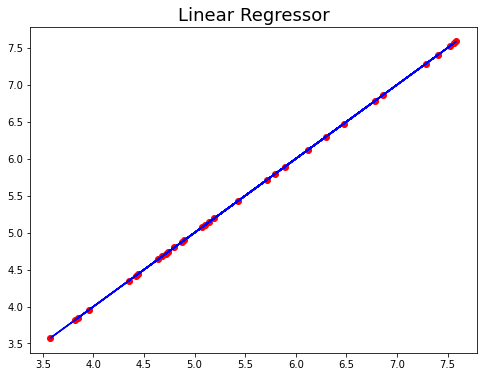

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Linear Regressor",fontsize=18)
plt.show()

In [44]:
model = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= -1, normalize= False)
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [45]:
import joblib
joblib.dump(model,"HappinessIndex.pkl")

['HappinessIndex.pkl']